# Chapter 12 - Cluster Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
kmeans = KMeans(n_clusters=3)  # Initialize the KMeans algorithm to perform clustering with 3 clusters

kmeans.fit(df)                 # Fit the KMeans model to the data (df), which learns the cluster centers and assigns points to clusters

kmeans.predict(df)             # Predict the cluster labels for the data points in 'df', assigning each point to one of the 3 clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [6]:
centroids = kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

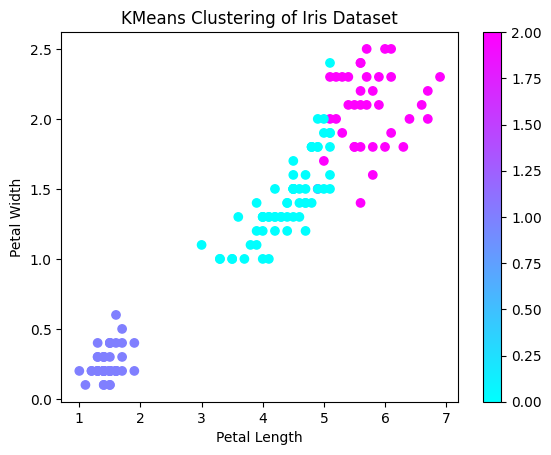

In [7]:
kpredict = kmeans.predict(df)      # Predict the cluster labels for each data point using the fitted KMeans model

# Create a scatter plot to visualize the clusters
plt.scatter(iris['petal_length'],  # x-axis: 'petal_length' from the iris dataset
            iris['petal_width'],   # y-axis: 'petal_width' from the iris dataset
            c=kpredict,            # Color each point based on the predicted cluster labels
            cmap='cool')           # Use the 'cool' colormap

plt.xlabel('Petal Length')         # Label the x-axis as 'Petal Length'
plt.ylabel('Petal Width')          # Label the y-axis as 'Petal Width'
plt.title('KMeans Clustering of Iris Dataset')  # Set the title of the plot
plt.colorbar()                     # Display a color bar
plt.show()                         # Display the plot

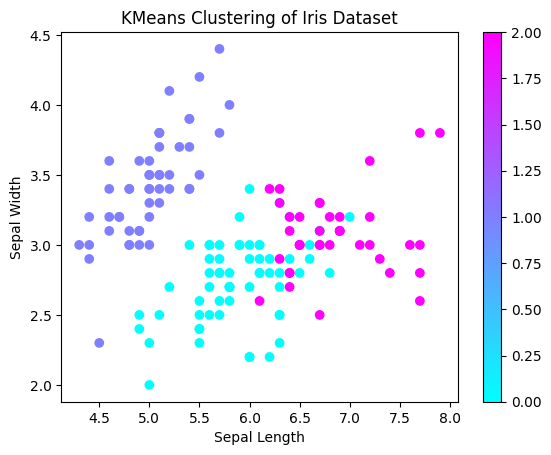

In [8]:
# Create a scatter plot to visualize the clusters
plt.scatter(iris['sepal_length'],  # x-axis: 'petal_length' from the iris dataset
            iris['sepal_width'],   # y-axis: 'petal_width' from the iris dataset
            c=kpredict,            # Color each point based on the predicted cluster labels
            cmap='cool')           # Use the 'cool' colormap

plt.xlabel('Sepal Length')         # Label the x-axis as 'Petal Length'
plt.ylabel('Sepal Width')          # Label the y-axis as 'Petal Width'
plt.title('KMeans Clustering of Iris Dataset')  # Set the title of the plot
plt.colorbar()                     # Display a color bar
plt.show()                         # Display the plot

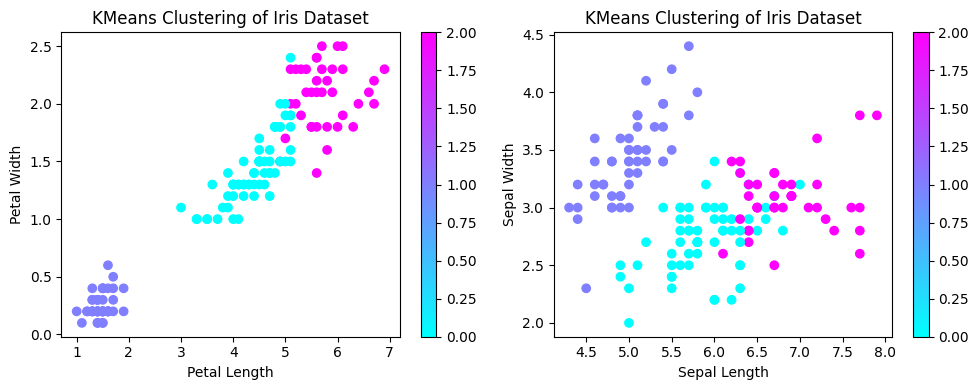

In [9]:
# Create a 1x2 subplot grid (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) 

# First scatter plot (Petal Length vs Petal Width)
scatter1 = ax[0].scatter(iris['petal_length'],        # x-axis: 'petal_length' from the iris dataset
                         iris['petal_width'],         # y-axis: 'petal_width' from the iris dataset
                         c=kpredict,                  # Color each point based on the predicted cluster labels
                         cmap='cool')                 # Use the 'cool' colormap
ax[0].set_xlabel('Petal Length')                      # Label the x-axis as 'Petal Length'
ax[0].set_ylabel('Petal Width')                       # Label the y-axis as 'Petal Width'
ax[0].set_title('KMeans Clustering of Iris Dataset')  # Set the title of the plot
fig.colorbar(scatter1, ax=ax[0])                      # Display a color bar for the first scatter plot

# Second scatter plot (Sepal Length vs Sepal Width)
scatter2 = ax[1].scatter(iris['sepal_length'],        # x-axis: 'sepal_length' from the iris dataset
                         iris['sepal_width'],         # y-axis: 'sepal_width' from the iris dataset
                         c=kpredict,                  # Color each point based on the predicted cluster labels
                         cmap='cool')                 # Use the 'cool' colormap
ax[1].set_xlabel('Sepal Length')                      # Label the x-axis as 'Sepal Length'
ax[1].set_ylabel('Sepal Width')                       # Label the y-axis as 'Sepal Width'
ax[1].set_title('KMeans Clustering of Iris Dataset')  # Set the title of the plot
fig.colorbar(scatter2, ax=ax[1])                      # Display a color bar for the second scatter plot

plt.tight_layout()                                    # Adjust the layout
plt.show()                                            # Show the plots

In [10]:
cluster = kmeans.labels_

cluster1 = iris.loc[cluster == 0]
cluster2 = iris.loc[cluster == 1]
cluster3 = iris.loc[cluster == 2]

In [11]:
cluster1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,62.000000,62.000000,62.000000,62.000000
mean,5.901613,2.748387,4.393548,1.433871
std,0.466410,0.296284,0.508895,0.297500
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.500000,4.025000,1.300000
50%,5.900000,2.800000,4.500000,1.400000
75%,6.200000,3.000000,4.800000,1.575000
max,7.000000,3.400000,5.100000,2.400000


In [12]:
cluster2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [13]:
cluster3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,38.000000,38.000000,38.000000,38.000000
mean,6.850000,3.073684,5.742105,2.071053
std,0.494155,0.290092,0.488590,0.279872
min,6.100000,2.500000,4.900000,1.400000
25%,6.425000,2.925000,5.425000,1.825000
50%,6.700000,3.000000,5.650000,2.100000
75%,7.200000,3.200000,6.000000,2.300000
max,7.900000,3.800000,6.900000,2.500000


### Hierarchical Clustering

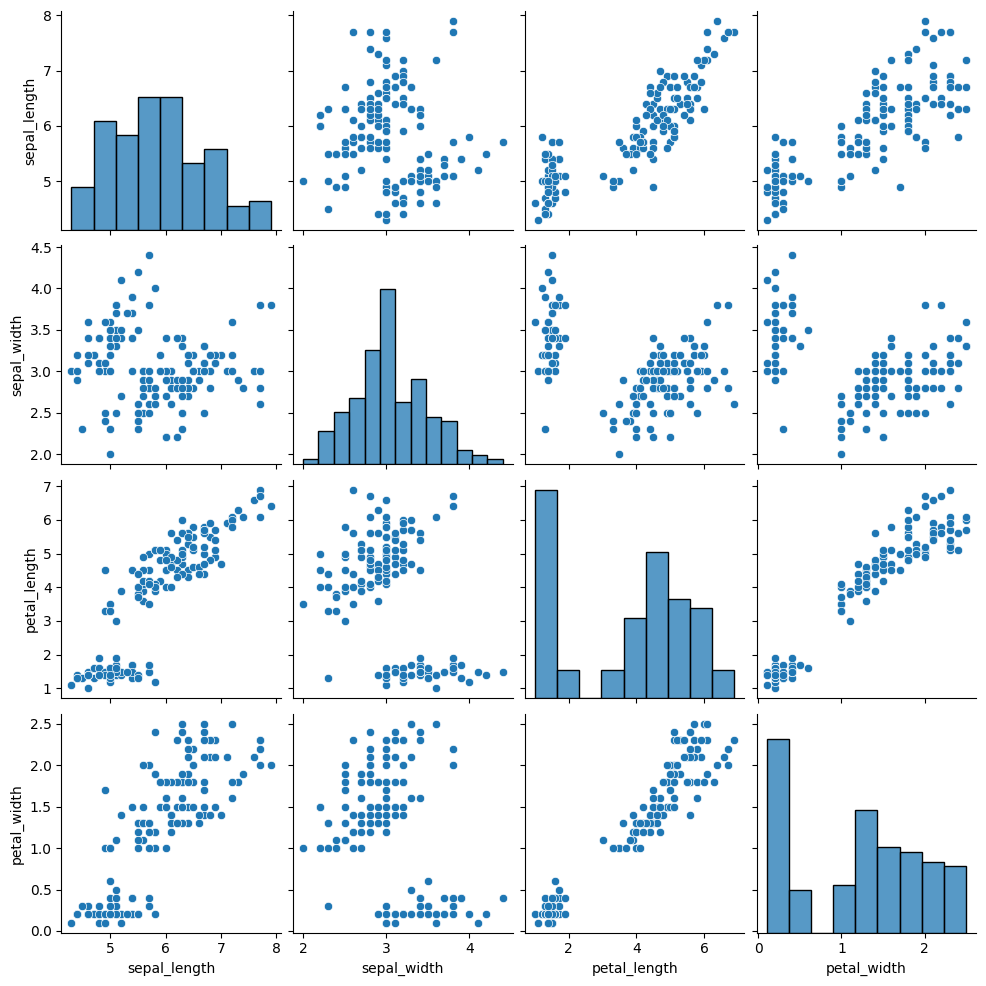

In [15]:
sns.pairplot(df);

In [16]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3,          # Initialize AgglomerativeClustering model to create 3 clusters
                                 linkage='single')      # Use the 'single' linkage criterion (merges clusters based on the distance between points)

groups.fit_predict(df)                                  # Fit the model to the data (df) and predict the cluster labels for each data point

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

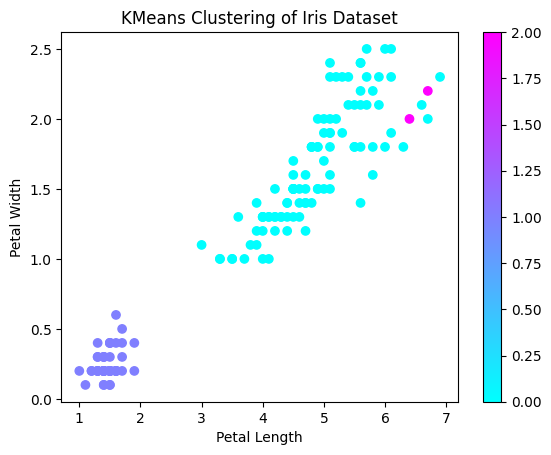

In [17]:
# Create a scatter plot to visualize the clusters
plt.scatter(df['petal_length'],  # x-axis: 'petal_length'
            df['petal_width'],   # y-axis: 'petal_width'
            c=groups.labels_,    # Color based on the cluster label predicted by AgglomerativeClustering
            cmap='cool')         # Use the 'cool' colormap

plt.xlabel('Petal Length')         # Label the x-axis as 'Petal Length'
plt.ylabel('Petal Width')          # Label the y-axis as 'Petal Width'
plt.title('KMeans Clustering of Iris Dataset')  # Set the title of the plot
plt.colorbar()                     # Display a color bar
plt.show()                         # Display the plot